In [26]:
import sys
import os
from datetime import datetime
sys.path.append(os.path.join(os.path.abspath('../')))

import requests
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt


from src.api.api import Api
from src.api.pollution_api import PollutionApi
from src.api.weather_api import WeatherApi
from src.util.position_offsetter import PositionOffsetter
from src.model.knn import KnnModel

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.linear_model import Perceptron

In [27]:
data = pd.read_csv('../data/training.csv')

data.drop(columns=['time'], inplace=True)

train_df, test_df = train_test_split(data, test_size=0.3)

train_df = train_df.dropna()
test_df = test_df.dropna()

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

stats={}


In [28]:
n_neighbors = range(1, 16)

maes = []
rmses = []
training_times = []
prediction_times = []

for k in n_neighbors:

    start_time = time.time()

    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

    end_time = time.time()
    training_time = end_time - start_time

    start_time = time.time()    
    predictions = knn_model.predict(test_df.drop(columns=['aqi']))
    end_time = time.time()
    prediction_time = end_time - start_time
    
    maes.append(np.mean(np.abs(predictions - test_df['aqi'])))
    rmses.append(np.sqrt(np.mean((predictions - test_df['aqi'])**2)))
    training_times.append(training_time)
    prediction_times.append(prediction_time)


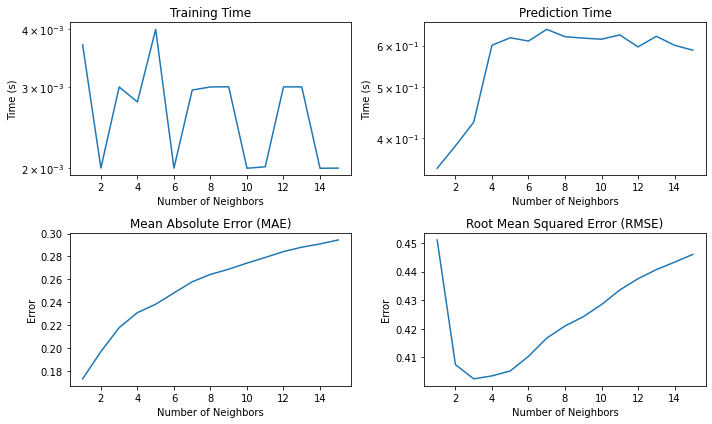

In [29]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(n_neighbors, training_times)
plt.title('Training Time')
plt.xlabel('Number of Neighbors')
plt.ylabel('Time (s)')
plt.yscale('log')

plt.subplot(2, 2, 2)
plt.plot(n_neighbors, prediction_times)
plt.title('Prediction Time')
plt.xlabel('Number of Neighbors')
plt.ylabel('Time (s)')
plt.yscale('log')

plt.subplot(2, 2, 3)
plt.plot(n_neighbors, maes)
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')

plt.subplot(2, 2, 4)
plt.plot(n_neighbors, rmses)
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')

plt.tight_layout()
plt.show()


In [30]:
start_time = time.time()

knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()

training_time = end_time - start_time

start_time = time.time()

predictions = knn_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()

prediction_time = end_time - start_time

model = "KNeighborsRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [31]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'KNeighborsRegressor'
training_time = 0.003635406494140625
prediction_time = 0.6234803199768066
Mean Absolute Error (MAE): 0.23100936524453694
Root Mean Squared Error (RMSE): 0.40354825816763884
Coefficient of Determination (R-squared): 0.8915874322833686
Mean Absolute Percentage Error (MAPE): 11.903941207075961
      Expected Value  Predicted Value
2143             5.0             4.25
2332             4.0             3.00
1565             2.0             1.50
1269             5.0             4.25
1598             4.0             3.25
1454             1.0             1.00
1689             1.0             1.50
775              1.0             1.25
1990             1.0             1.25
1706             4.0             3.00
1479             2.0             2.00
416              2.0             2.00
3551             3.0             3.50
2408             1.0             1.75
3792             1.0             1.50


In [32]:
start_time = time.time()

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()
predictions = rf_model.predict(test_df.drop(columns=['aqi']))
end_time = time.time()
prediction_time = end_time - start_time

model = "RandomForestRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [33]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'RandomForestRegressor'
training_time = 2.4728684425354004
prediction_time = 0.01604771614074707
Mean Absolute Error (MAE): 0.0010587929240374603
Root Mean Squared Error (RMSE): 0.024343086247945678
Coefficient of Determination (R-squared): 0.999605506408943
Mean Absolute Percentage Error (MAPE): 0.045499479708636825
      Expected Value  Predicted Value
197              2.0              2.0
433              1.0              1.0
1914             1.0              1.0
3098             1.0              1.0
1471             5.0              5.0
2122             2.0              2.0
2282             5.0              5.0
41               2.0              2.0
2848             1.0              1.0
3391             2.0              2.0
1397             3.0              3.0
841              2.0              2.0
2542             1.0              1.0
951              3.0              3.0
3434             4.0              4.0


In [34]:
start_time = time.time()

gb_model = GradientBoostingRegressor()
gb_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = gb_model.predict(test_df.drop(columns=['aqi']))
end_time = time.time()
prediction_time = end_time - start_time

model = "GradientBoostingRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [35]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'GradientBoostingRegressor'
training_time = 2.85044264793396
prediction_time = 0.007162570953369141
Mean Absolute Error (MAE): 0.005504609338925985
Root Mean Squared Error (RMSE): 0.02977599296897614
Coefficient of Determination (R-squared): 0.9994097701317789
Mean Absolute Percentage Error (MAPE): 0.30338322978467536
      Expected Value  Predicted Value
220              3.0         2.999900
49               2.0         1.997330
712              4.0         4.002135
2447             1.0         1.001034
1874             4.0         4.001128
474              2.0         1.999279
3586             2.0         2.011633
2863             2.0         2.007276
731              1.0         1.001236
260              1.0         1.001034
2574             1.0         1.001034
1766             3.0         2.999900
810              2.0         2.051744
1151             1.0         1.001034
1731             2.0         1.997330


In [36]:
start_time = time.time()

ada_model = AdaBoostRegressor()
ada_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = ada_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()
prediction_time = end_time - start_time

model = "AdaBoostRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [37]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'AdaBoostRegressor'
training_time = 0.7960119247436523
prediction_time = 0.01199960708618164
Mean Absolute Error (MAE): 0.1142454092398162
Root Mean Squared Error (RMSE): 0.14798122227947452
Coefficient of Determination (R-squared): 0.9854218673812102
Mean Absolute Percentage Error (MAPE): 9.235361898287948
      Expected Value  Predicted Value
494              1.0         1.177536
3343             1.0         1.177536
1000             4.0         3.915739
1099             4.0         4.000000
1682             3.0         2.736243
3267             1.0         1.177536
1407             1.0         1.177536
3488             2.0         2.047346
3230             1.0         1.151835
2173             2.0         2.010856
2381             2.0         2.010856
2617             2.0         2.000809
3114             2.0         2.009704
1668             3.0         2.736243
1679             1.0         1.177536


In [38]:
start_time = time.time()

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = mlp_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()
prediction_time = end_time - start_time

model = "MLPRegressor"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [39]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'MLPRegressor'
training_time = 5.9439778327941895
prediction_time = 0.0069997310638427734
Mean Absolute Error (MAE): 0.3208286664354171
Root Mean Squared Error (RMSE): 0.42452677564105495
Coefficient of Determination (R-squared): 0.8800227645009996
Mean Absolute Percentage Error (MAPE): 17.099288743090423
      Expected Value  Predicted Value
1750             1.0         0.990273
190              1.0         1.475246
1578             5.0         4.552380
577              5.0         3.746081
3781             2.0         1.214501
2900             5.0         4.471409
2889             2.0         1.946083
2027             1.0         0.884965
397              1.0         1.133220
2395             4.0         3.694216
985              4.0         3.252258
1311             2.0         2.379075
1596             2.0         1.742826
3498             3.0         2.567268
125              1.0         1.224050


In [40]:
start_time = time.time()

nb_model = GaussianNB()
nb_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = nb_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()
prediction_time = end_time - start_time

model = "GaussianNB"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [41]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'GaussianNB'
training_time = 0.0060002803802490234
prediction_time = 0.006000995635986328
Mean Absolute Error (MAE): 0.27653485952133194
Root Mean Squared Error (RMSE): 0.5808691324312615
Coefficient of Determination (R-squared): 0.7753816288682571
Mean Absolute Percentage Error (MAPE): 15.409295872355184
      Expected Value  Predicted Value
372              1.0              1.0
2258             5.0              5.0
1214             1.0              1.0
1524             4.0              4.0
1381             1.0              1.0
3047             1.0              1.0
3586             2.0              2.0
2030             2.0              1.0
3815             1.0              1.0
2189             1.0              1.0
1453             1.0              1.0
473              5.0              5.0
390              1.0              1.0
580              5.0              5.0
1746             4.0              5.0


In [42]:
start_time = time.time()

perceptron_model = Perceptron()
perceptron_model.fit(train_df.drop(columns=['aqi']), train_df['aqi'])

end_time = time.time()
training_time = end_time - start_time

start_time = time.time()

predictions = perceptron_model.predict(test_df.drop(columns=['aqi']))

end_time = time.time()
prediction_time = end_time - start_time

model = "Perceptron"
stats[model] = {"training_time": training_time, "prediction_time": prediction_time}

In [43]:
print(f"{model = }")
print(f"{training_time = }")
print(f"{prediction_time = }")

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predictions - test_df['aqi']))
stats[model]['mae'] = mae
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_df['aqi'])**2))
stats[model]['rmse'] = rmse
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
ss_total = np.sum((test_df['aqi'] - np.mean(test_df['aqi']))**2)
ss_residual = np.sum((test_df['aqi'] - predictions)**2)
r_squared = 1 - (ss_residual / ss_total)
stats[model]['r_squared'] = r_squared
print("Coefficient of Determination (R-squared):", r_squared)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predictions - test_df['aqi']) / test_df['aqi'])) * 100
stats[model]['mape'] = mape
print("Mean Absolute Percentage Error (MAPE):", mape)


random_predictions = test_df.sample(15)
random_predictions['Expected Value'] = random_predictions['aqi']
random_predictions['Predicted Value'] = predictions[random_predictions.index]
print(random_predictions[['Expected Value', 'Predicted Value']])

model = 'Perceptron'
training_time = 0.04999995231628418
prediction_time = 0.0010001659393310547
Mean Absolute Error (MAE): 0.44250780437044746
Root Mean Squared Error (RMSE): 0.7410583875909769
Coefficient of Determination (R-squared): 0.6344106542335319
Mean Absolute Percentage Error (MAPE): 19.5581859174471
      Expected Value  Predicted Value
3244             1.0              1.0
3402             5.0              5.0
2402             1.0              1.0
818              1.0              1.0
933              1.0              1.0
1828             4.0              5.0
1263             1.0              1.0
2065             4.0              4.0
3305             4.0              5.0
3524             1.0              1.0
1895             1.0              1.0
772              1.0              1.0
829              4.0              4.0
397              1.0              1.0
3128             1.0              1.0


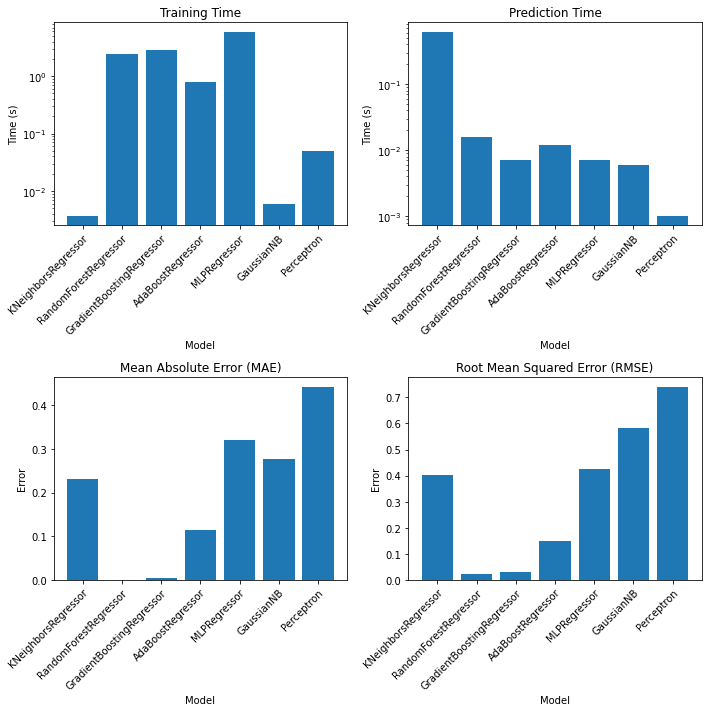

In [44]:
models = list(stats.keys())
training_times = [stats[model]['training_time'] for model in models]
prediction_times = [stats[model]['prediction_time'] for model in models]
maes = [stats[model]['mae'] for model in models]
rmses = [stats[model]['rmse'] for model in models]
r_squareds = [stats[model]['r_squared'] for model in models]
mapes = [stats[model]['mape'] for model in models]

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.bar(models, training_times)
plt.title('Training Time')
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.subplot(2, 2, 2)
plt.bar(models, prediction_times)
plt.title('Prediction Time')
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.subplot(2, 2, 3)
plt.bar(models, maes)
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('Error')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.subplot(2, 2, 4)
plt.bar(models, rmses)
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.ylabel('Error')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.tight_layout()
plt.show()
